In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv("spam.csv",encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2208,spam,URGENT!! Your 4* Costa Del Sol Holiday or å£50...,NaN,NaN,NaN
719,ham,Macha dont feel upset.i can assume your mindse...,NaN,NaN,NaN
5066,spam,83039 62735=å£450 UK Break AccommodationVouche...,NaN,NaN,NaN
5295,ham,Alex says he's not ok with you not being ok wi...,NaN,NaN,NaN
1645,ham,I.ll post her out l8r. In class,NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1599,ham,"Yeah probably, I still gotta check out with leo"
4355,ham,Great. So should i send you my account number.
247,ham,Kallis wont bat in 2nd innings.
4116,ham,Sure thing big man. i have hockey elections at...
3571,ham,"Yup, leaving right now, be back soon"


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

In [17]:
#EDAs
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

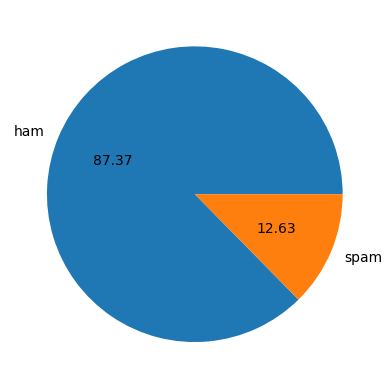

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
#data imbalance
!pip install nltk


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\deend/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_char']=df['text'].apply(len) #number of characters

In [23]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#ham msg
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#spam msg
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

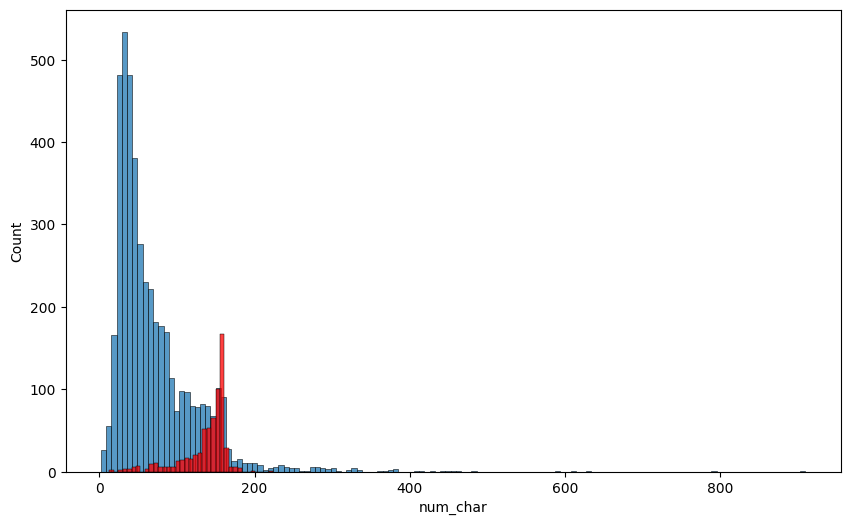

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

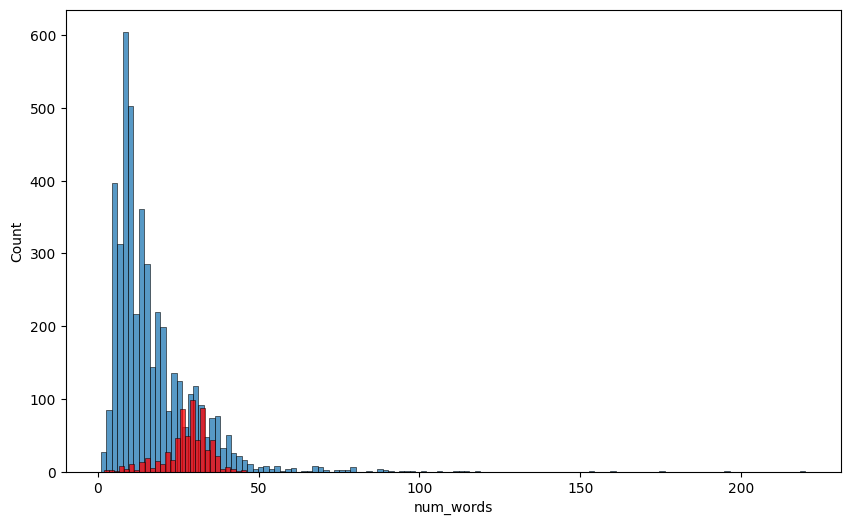

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

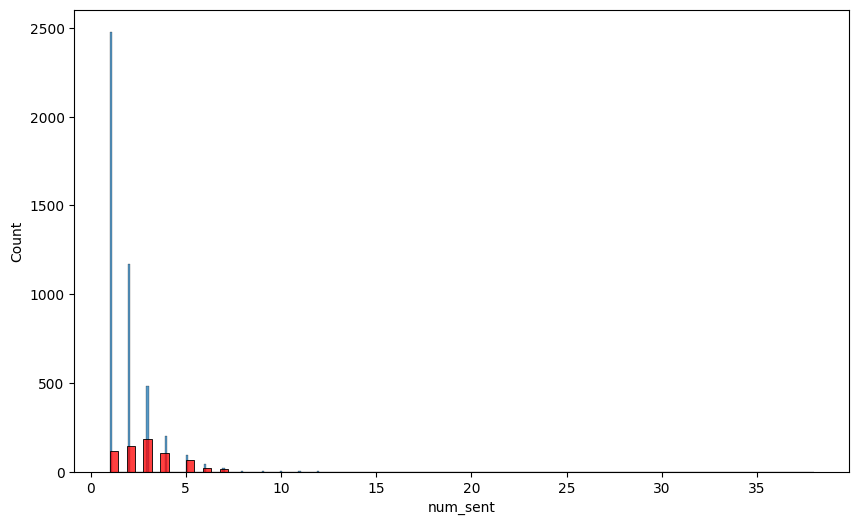

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

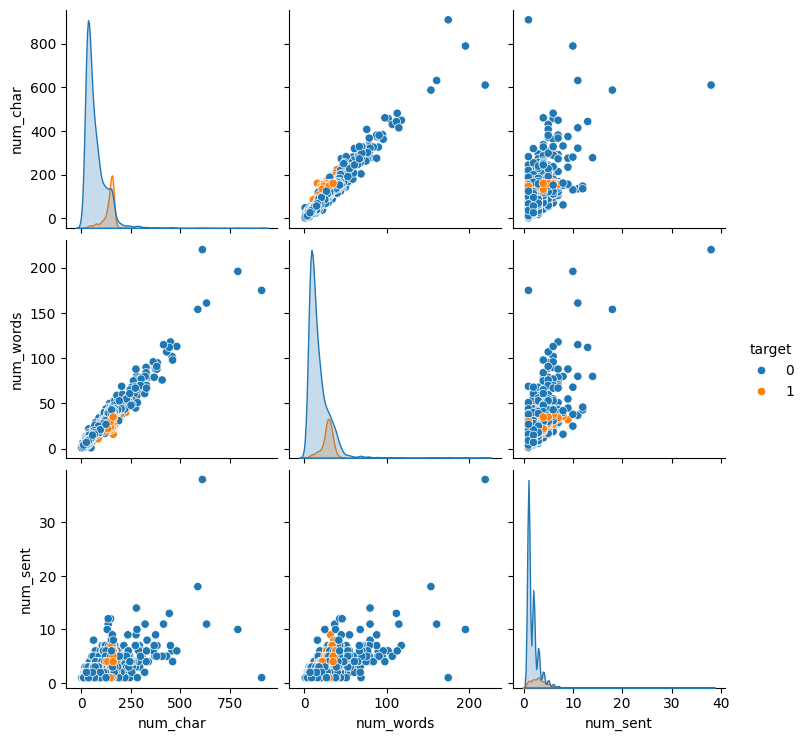

In [33]:
sns.pairplot(df,hue='target')

In [34]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

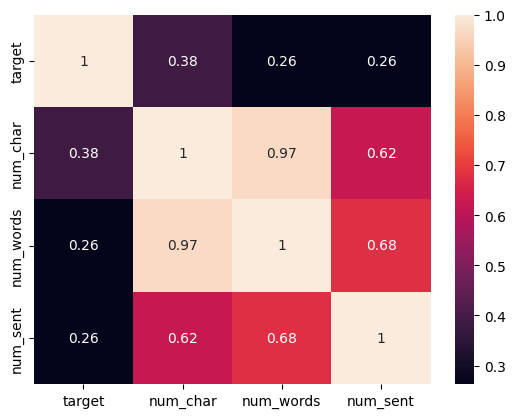

In [35]:
numeric_df = df.select_dtypes(include=['int32','int64', 'float64'])
sns.heatmap(numeric_df.corr(),annot=True)

In [36]:
print(df.dtypes)


target        int32
text         object
num_char      int64
num_words     int64
num_sent      int64
dtype: object


In [37]:
#we will keep numchar because num sent and word have very high correlation they will introduce multicollinearity 

In [38]:
#Data preprocessing
##data preproccessing -> lower , tokenisation , removing spcl char ,removing stop word and punctuation ,stemming

In [51]:
import nltk
def transform_data(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[] 
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [45]:
from nltk.corpus import stopwords
import string

In [52]:
transform_data("HI how are you Ishika . I loved the lectures on machine learning??")

'hi ishika love lectur machin learn'

In [43]:
!pip install nltk


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'